In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img

# Images should be normalized!!! (divide by 255)

In [2]:
from tensorflow.keras.models import load_model

autoEncoder = load_model("autoencoderV3B.h5")

In [3]:
autoEncoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856 

# Auto Encoder

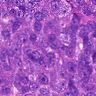

In [4]:
# Load the image
img = load_img("../Data/train_labels/example.tif")
img

In [5]:
img_array = img_to_array(img)

In [6]:
img_array.shape

(96, 96, 3)

In [7]:

img_normalized = np.array([img_array/255])

In [8]:
img_normalized.shape

(1, 96, 96, 3)

In [9]:
output = autoEncoder.predict(img_normalized)

In [10]:
img_array.shape

(96, 96, 3)

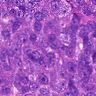

In [11]:
# Load the image
# img = load_img("../Data/train_labels/example.tif")
# img
array_to_img(img_array)

In [12]:
output[0].shape

(96, 96, 3)

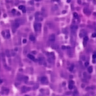

In [13]:
array_to_img(output[0]*255)

In [14]:
from keras.models import Model

# assume you have already created an autoencoder model named 'autoencoder_model'

# create a new model that takes the input of the autoencoder
encoder = Model(inputs=autoEncoder.input, outputs=autoEncoder.layers[6].output)

# print the summary of the model to verify that it has the first 5 layers
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856 

In [15]:
# encoder.save("encoder_model.h5")

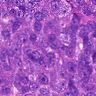

In [16]:
array_to_img(img_array)

# Decision Tree Example